<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/dabl/eda_dabl_fulldataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Full dataset EDA with DABL
Here I will use DABL's plotting features to quickly look at the data and potentially identify important features.



#Setup

**Mount Google Drive**

To have access to the shared group 9 project folder, first create a shortcut to it in your drive. Then run the cell below to mount your google drive and follow the prompt to get the code.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
!pip install dabl

Mounted at /content/gdrive


In [73]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import time
import dabl

from dabl import plot
from pandas.api.types import CategoricalDtype

In [4]:
root_path = '/content/gdrive/MyDrive/team_9/Datasets/'

A list of all of the features to use for making indexes

In [59]:
ind = ['STATE_ABBR',
 'YEAR',
 'MONTH',
 'AGE_GRP_18_24',
 'AGE_GRP_25_39',
 'AGE_GRP_40_49',
 'AGE_GRP_50_59',
 'AGE_GRP_60_69',
 'AGE_GRP_70_up',
 'AGE_GRP_less_18',
 'COVID_VACC_DOSE_not_plan_all_dose',
 'COVID_VACC_DOSE_plan_to_receive_all_doses',
 'COVID_VACC_DOSE_received_all_doses',
 'EDUCATION_bachelor_or_higher',
 'EDUCATION_high_school_diploma_GED',
 'EDUCATION_less_high school',
 'EDUCATION_some_college_asscte_degree',
 'INCOME_BEFORE_TAX_$100,000_$149,999',
 'INCOME_BEFORE_TAX_$150,000_$199,999',
 'INCOME_BEFORE_TAX_$200,000_above',
 'INCOME_BEFORE_TAX_$25,000_$34,999',
 'INCOME_BEFORE_TAX_$35,000_$49,999',
 'INCOME_BEFORE_TAX_$50,000_$74,999',
 'INCOME_BEFORE_TAX_$75,000_$99,999',
 'INCOME_BEFORE_TAX_Less_$25,000',
 'RACE_Any_other_race_alone_or_mixed_race',
 'RACE_Asian,_alone',
 'RACE_Black_alone',
 'RACE_White_alone',
 'FOOD_SCARCITY',
 'HOUSING_INSECURITY',
 'MALE',
 'FEMALE',
 'HISPANIC_ORIGIN',
 'RECVD_COVID_VACC',
 'CHILDCARE_ISSUE',
 'Expected recovery index',
 'Financial stress index',
 'Market challenges index',
 'Market(s) challenges index',
 'Operational challenges index',
 'Overall sentiment index',
 ]

## Import the dataset and add date column

In [80]:
df = pd.read_csv('/content/gdrive/MyDrive/team_9/Datasets/hps_sbps_unemp_merged.csv')
df = df.drop(columns = df.columns[0])

In [81]:
df['DAY'] = np.ones((800,1))
df['DATE'] = pd.to_datetime(df[["YEAR","MONTH","DAY"]])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   STATE_ABBR                                 800 non-null    object        
 1   YEAR                                       800 non-null    int64         
 2   MONTH                                      800 non-null    int64         
 3   AGE_GRP_18_24                              800 non-null    float64       
 4   AGE_GRP_25_39                              800 non-null    float64       
 5   AGE_GRP_40_49                              800 non-null    float64       
 6   AGE_GRP_50_59                              800 non-null    float64       
 7   AGE_GRP_60_69                              800 non-null    float64       
 8   AGE_GRP_70_up                              800 non-null    float64       
 9   AGE_GRP_less_18      

In [83]:
df = dabl.clean(df)
df['STATE_ABBR'] = df['STATE_ABBR'].astype('category')
df['MONTH'] = df['MONTH'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   STATE_ABBR                                 800 non-null    category      
 1   YEAR                                       800 non-null    category      
 2   MONTH                                      800 non-null    category      
 3   AGE_GRP_18_24                              800 non-null    float64       
 4   AGE_GRP_25_39                              800 non-null    float64       
 5   AGE_GRP_40_49                              800 non-null    float64       
 6   AGE_GRP_50_59                              800 non-null    float64       
 7   AGE_GRP_60_69                              800 non-null    float64       
 8   AGE_GRP_70_up                              800 non-null    float64       
 9   AGE_GRP_less_18      

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression
Showing only top 10 of 39 continuous features


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column unemployment_rate.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8209ca1ad0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820acac110>,
       dtype=object)]

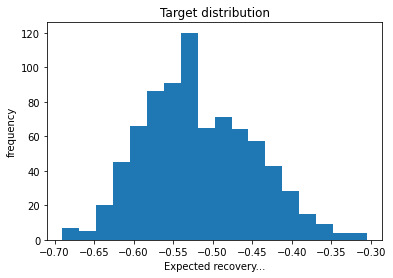

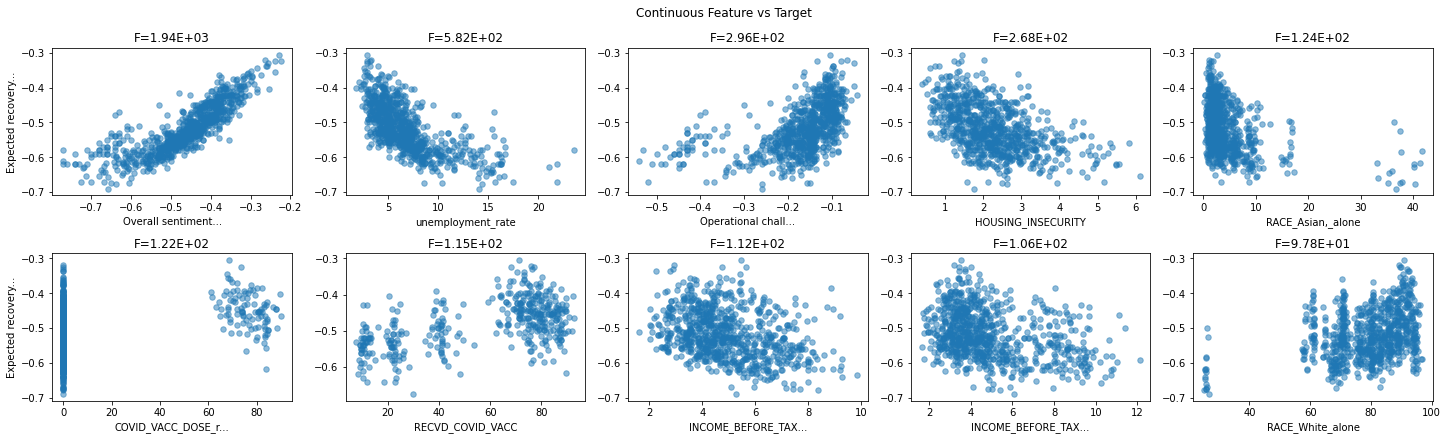

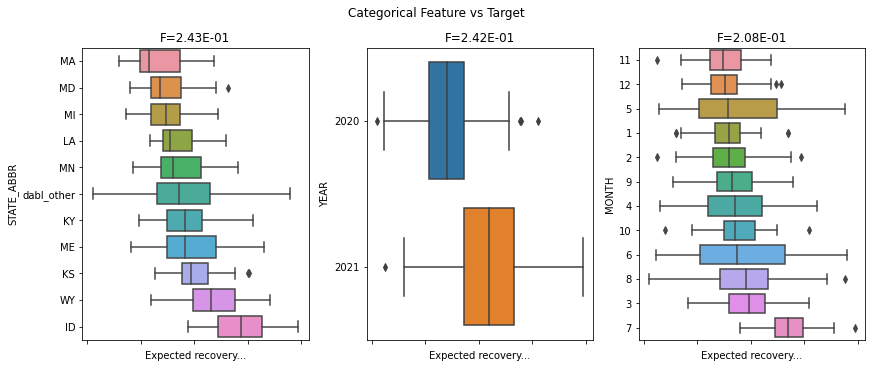

In [84]:
plot(df, 'Expected recovery index')

In [86]:
ec = dabl.SimpleRegressor(random_state = 0).fit(df, target_col = 'Expected recovery index')

Running DummyRegressor()
r2: -0.009 neg_mean_squared_error: -0.005
=== new best DummyRegressor() (using r2):
r2: -0.009 neg_mean_squared_error: -0.005

Running DecisionTreeRegressor(max_depth=1)
r2: 0.554 neg_mean_squared_error: -0.002
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.554 neg_mean_squared_error: -0.002

Running DecisionTreeRegressor(max_depth=5)
r2: 0.773 neg_mean_squared_error: -0.001
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.773 neg_mean_squared_error: -0.001

Running Ridge(alpha=10)
r2: 0.914 neg_mean_squared_error: -0.000
=== new best Ridge(alpha=10) (using r2):
r2: 0.914 neg_mean_squared_error: -0.000

Running Lasso(alpha=10)
r2: -0.009 neg_mean_squared_error: -0.005

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.914 neg_mean_squared_error: -0.000


Selecting features this time. We definitely need to come up with a different feature representation for age, income, education. It's hard working with percentages of categorical data.

In [87]:
h_ind = ['STATE_ABBR',
 'DATE',
 'RACE_Asian,_alone',
 'RACE_Black_alone',
 'RACE_White_alone',
 'INCOME_BEFORE_TAX_Less_$25,000',
 'FOOD_SCARCITY',
 'HOUSING_INSECURITY',
 'RECVD_COVID_VACC',
 'CHILDCARE_ISSUE',
 'Financial stress index',
 'Market(s) challenges index',
 'Operational challenges index',
 'unemployment_rate',
 'Expected recovery index',
 'Overall sentiment index',
 'MONTH',
 'YEAR',
 ]
df2 = df[h_ind]

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column unemployment_rate.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column INCOME_BEFORE_TAX_Less_$25,000.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82097477d0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8209367650>,
       dtype=object)]

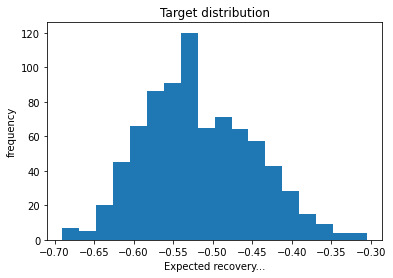

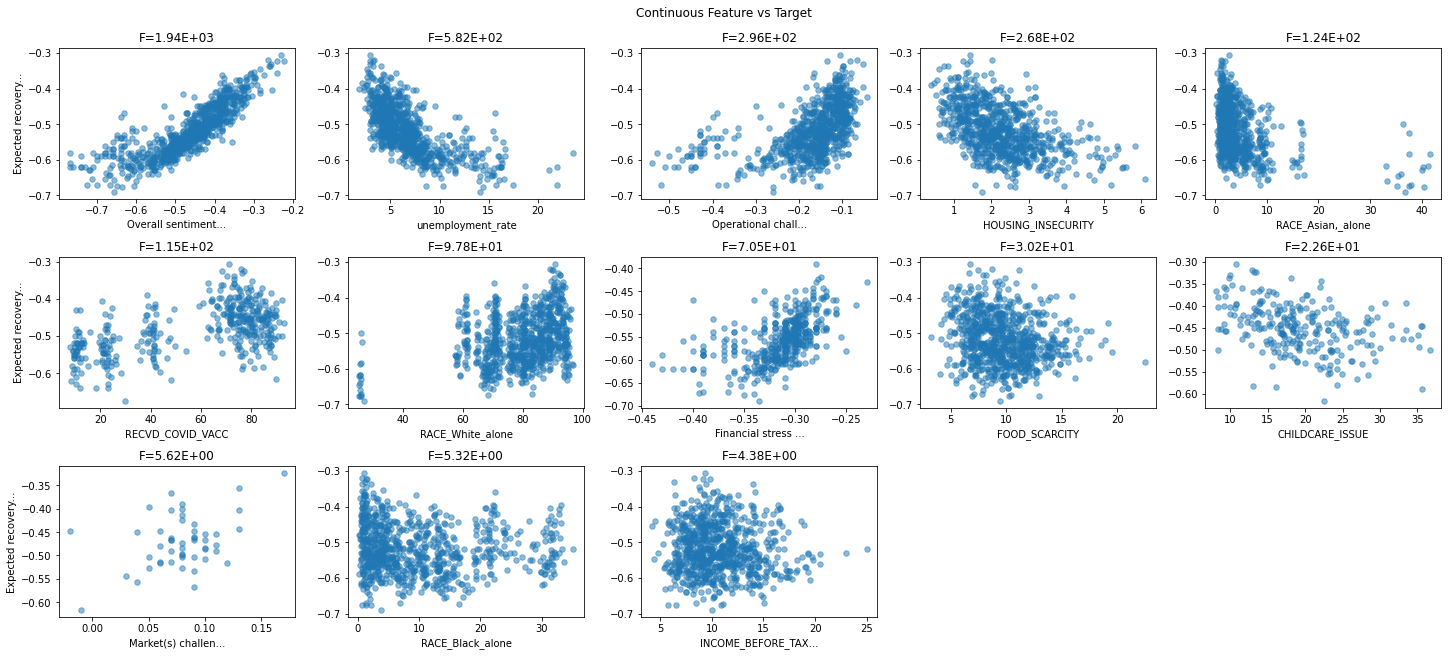

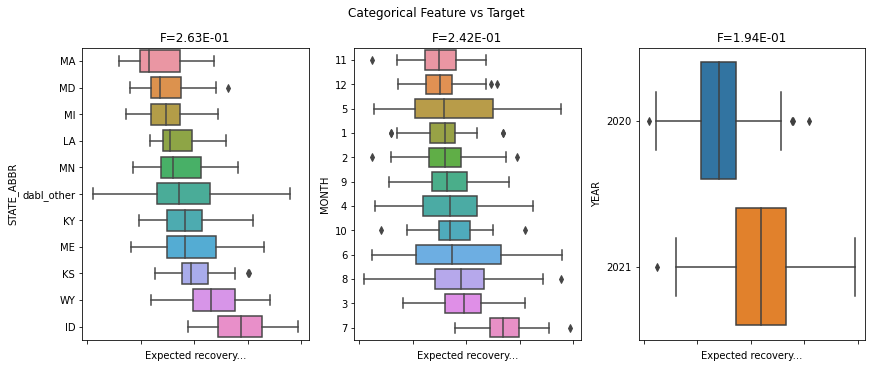

In [88]:
plot(df2, 'Expected recovery index')

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column INCOME_BEFORE_TAX_Less_$25,000.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8208deb490>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8208b6e390>,
       dtype=object)]

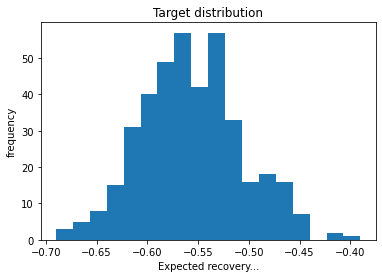

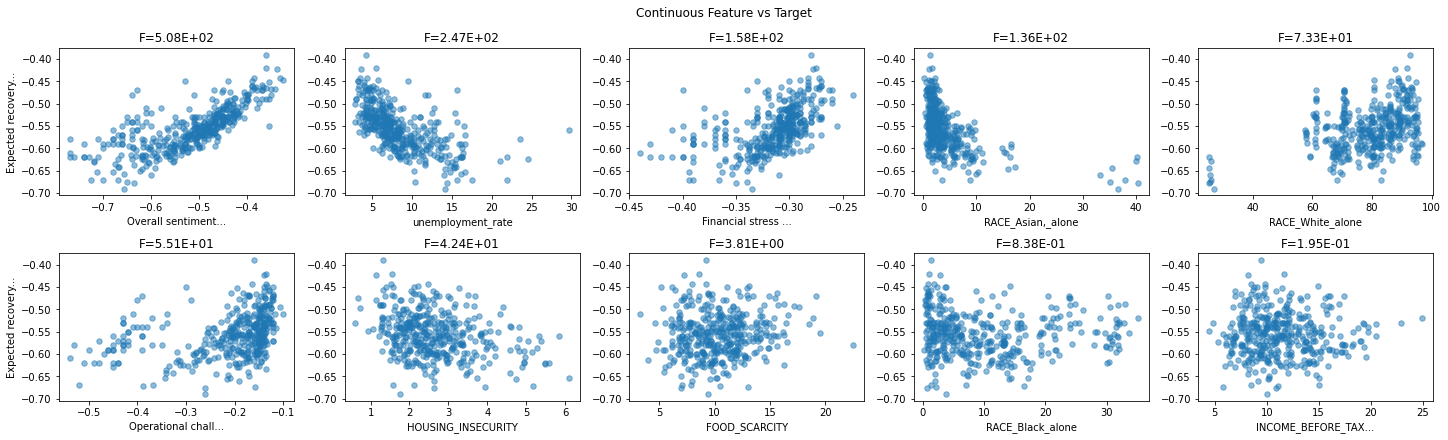

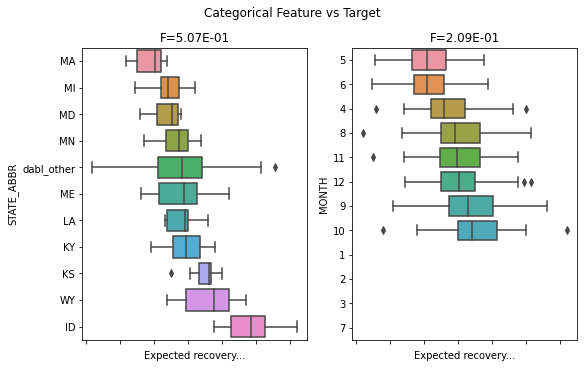

In [89]:
plot(df2[df2['YEAR'] == '2020'], 'Expected recovery index')

Why doesn't it show January, Febraury, March or July??

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82087447d0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820860ccd0>,
       dtype=object)]

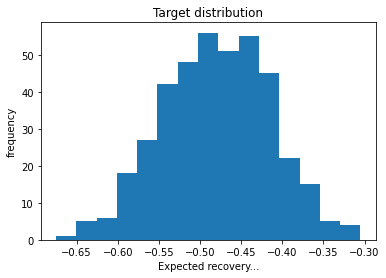

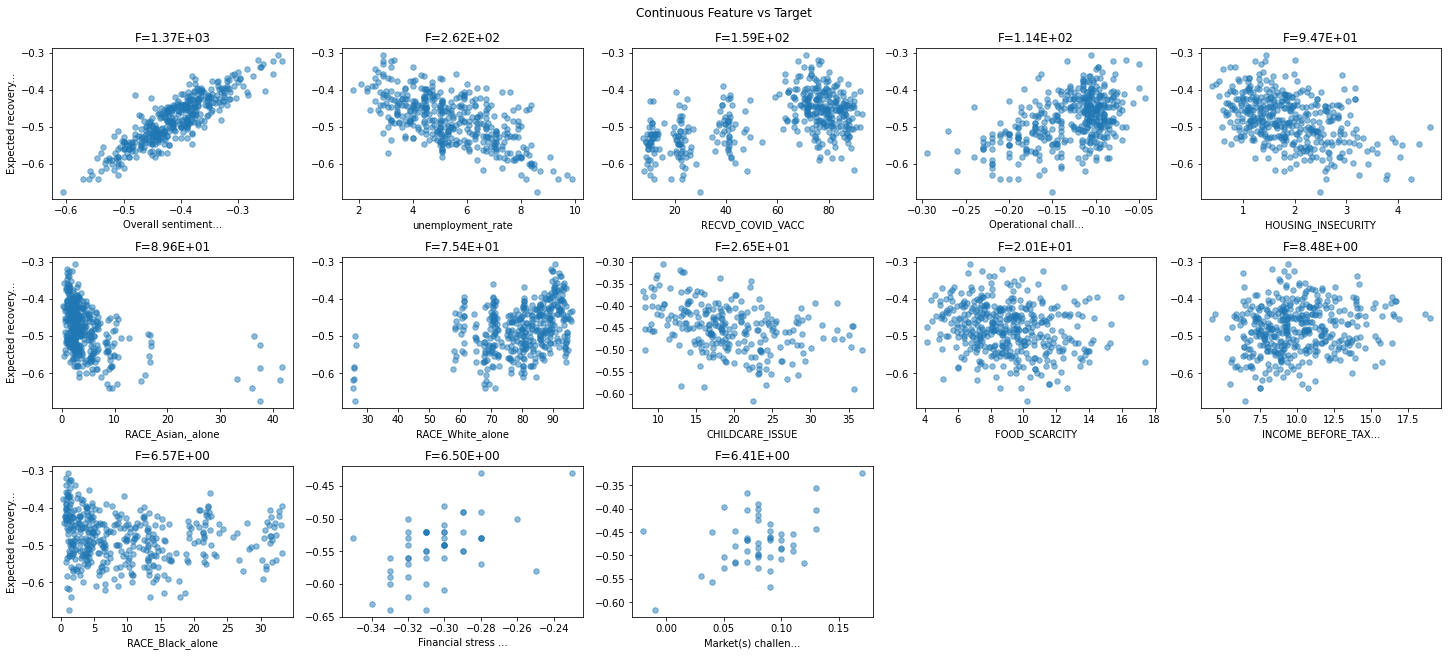

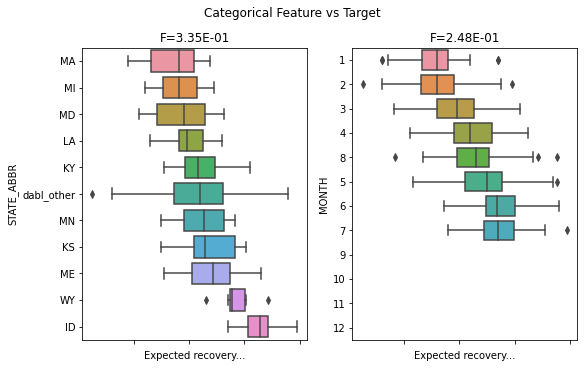

In [90]:
plot(df2[df2['YEAR'] == '2021'], 'Expected recovery index')